In [1]:
import sys
sys.path.append('../src')

from time_series import (

    # Load results
    load_results_run,

    # Analyse results
    count_lower_mape,
    plot_distributions,
    hypothesis_tests,
    plot_percentual_lower_mape_on_set,
)


In [2]:
# Parameters
from sklearn.linear_model import LinearRegression
model_class = LinearRegression
p_first = 1
p_last = 30


In [3]:
# Load results
results_run = load_results_run(
    folder="../results",
    file_name=f"{model_class.__name__}_{p_first}_{p_last}_.pkl"
)


Loaded 2940 experiments from 'LinearRegression_1_30_.pkl'


In [4]:
# Count lower MAPE in train and test

results_count = count_lower_mape(results_run, model_class=model_class)
display(results_count)


,train_count,train_pct,test_count,test_pct
n_lags_future,,,,
1,98,100.0,50,51.020408
2,98,100.0,63,64.285714
3,98,100.0,61,62.244898
4,98,100.0,58,59.183673
5,98,100.0,60,61.224490
6,98,100.0,67,68.367347
7,98,100.0,67,68.367347
8,98,100.0,67,68.367347
9,98,100.0,80,81.632653


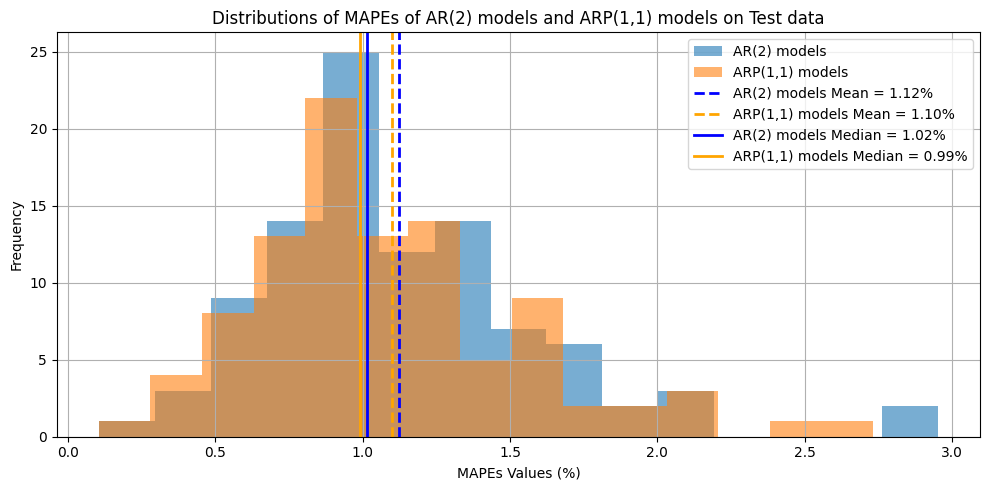

In [5]:
plot_distributions(
    results_run=results_run,
    model_class=model_class.__name__,
    n_lags_future_range=range(1, 1+1),
    # n_lags_future_range=range(p_first, p_last+1),
    set_type="test"
)


In [6]:
# Hypothesis Testing

results_ht = hypothesis_tests(
    results_run=results_run,
    model_class=model_class,
    n_lags_future_range=range(p_first, 1+1)
)


In [7]:
for p, result in results_ht.items():
    print(f"\nFor n_lags_future = {p}:")
    print("-" * 70)
    print(">> MAPE_train Hypothesis Tests:")
    display(result["MAPE_train"])
    print("\n>> MAPE_test Hypothesis Tests:")
    display(result["MAPE_test"])



For n_lags_future = 1:
----------------------------------------------------------------------
>> MAPE_train Hypothesis Tests:


,Hypothesis Test,Statistic,P Value,Decision
0,Mann-Whitney U Test,7269.000000,5.240449e-10,Reject H0
1,Kruskal-Wallis H Test,38.601232,5.198609e-10,Reject H0
2,Wilcoxon Signed-Rank Test,0.000000,8.330397e-18,Reject H0



>> MAPE_test Hypothesis Tests:


,Hypothesis Test,Statistic,P Value,Decision
0,Mann-Whitney U Test,4956.00000,0.699067,Fail to Reject H0
1,Kruskal-Wallis H Test,0.15042,0.698135,Fail to Reject H0
2,Wilcoxon Signed-Rank Test,1875.00000,0.051088,Fail to Reject H0


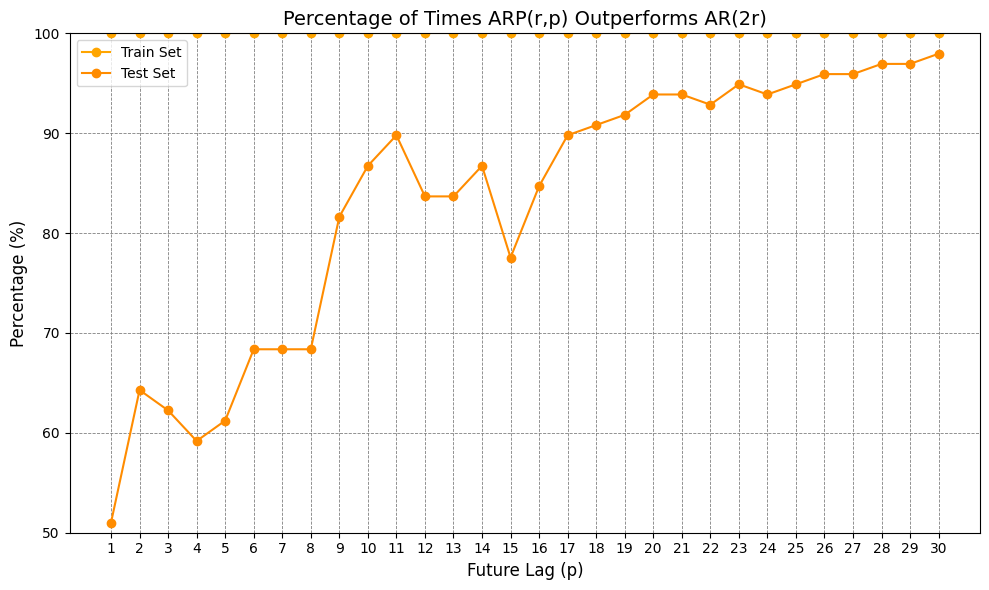

In [8]:
# Percentual
plot_percentual_lower_mape_on_set(results_count)
